### Neural Network Classification With PyTorch 

- Classification is a problem of predicting whether something is one thing or another there can be multiple thing as the options  

# DATA LOAD

In [1]:
!pip install scikit-learn

In [2]:
import sklearn
from sklearn.datasets import make_circles

In [3]:
# Make 1000 saples 
n_samples = 1000

# Create samples 
X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [4]:
len(X)

1000

In [5]:
len(y)

1000

In [6]:
print(f'First 5 sample of X:\n{X[:5]}')
print(f'First 5 sample of y:\n{y[:5]}')

First 5 sample of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 sample of y:
[1 1 1 1 0]


In [7]:
# Make data frame of circle data 
import pandas as pd 
circles = pd.DataFrame({"X1":X[:,0], "X2":X[:,1],"label":y})

In [8]:
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [9]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

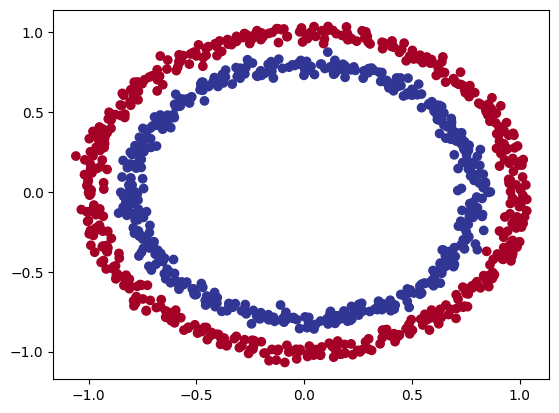

In [10]:
# Visualize, Visualize, Visualize 
import matplotlib.pyplot as plt 
plt.scatter(x=X[:,0],y=X[:,1],c=y ,cmap=plt.cm.RdYlBu)

Note: The data we work with is often referred to as a toy dataset, a dataset that is small enough to experiment on but still sizable enough to test on. 

### Turing Data Into Tensors

### 1.1 Check input and output shapes

In [11]:
X.shape , y.shape

((1000, 2), (1000,))

In [12]:
#* View the first example of features and labels 
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y:{y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y:{y_sample.shape}")


Values for one sample of X: [0.75424625 0.23148074] and the same for y:1
Shapes for one sample of X: (2,) and the same for y:()


### 1.2 Turn data into tensors and create train and test splits

In [13]:
# import Torch
import torch
torch.__version__

'2.1.2+cu118'

In [14]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [15]:
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

In [16]:
# Turn data into tensors 
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X[:5] , y[:5]


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [17]:
X.dtype, y.dtype

(torch.float32, torch.float32)

### Split data into test and train sets 

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
len(X_train), len(X_test), len(y_train),len(y_test)

(800, 200, 800, 200)

In [20]:
n_samples

1000

# Building a Model

Lets build a model that classify our blue and red dots. 

To do so we want to:
1. Set up device agnostic code 
2. Our code will run on gpu if there is one 
3. Construct a model (bu subclassing nn.module)
4. Define loss function and optimizer 


In [21]:
import torch 
from torch import nn 

# make device agnostic code 
device =  'cuda' if torch.cuda.is_available else 'cpu'
device

'cuda'

### Construct Our Model

1. Subclass nn.Module (almost all modules in PyTorch subclass nn.Module)
2. Create 2 nn.LinearLayer() layers are capable of handling the shapes of our data 
3. Define a forward method that outlines the forward pass ( or forward computation) of the model 
4. Instantiate an instance of our model class and send it to the target device 

In [22]:
X_train.shape


torch.Size([800, 2])

In [23]:
from sklearn import datasets

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2,out_features=5) #* takes in 2 features and upscales to 5 features 
        self.layer2 = nn.Linear(in_features=5,out_features=1) #* takes in 5 features from previous layer and out single features 
        
        # self.two_linear = nn.Sequential(nn.Linear(in_features=2,out_features=5),
        #                                 nn.Linear(in_features=2,out_features=5)
        #                                 )
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer2(self.layer1(x))
    
    
#* instantiate a instane of our circleModel object and send it to the device 

model = CircleModelV0()
model.to(device)

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [24]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.5664,  0.5986],
                      [ 0.1420, -0.1477],
                      [ 0.2287, -0.3141],
                      [ 0.6387,  0.1122],
                      [ 0.0236,  0.0562]], device='cuda:0')),
             ('layer1.bias',
              tensor([ 0.2180, -0.0689,  0.6019,  0.4348, -0.6411], device='cuda:0')),
             ('layer2.weight',
              tensor([[ 0.3202, -0.2121,  0.0751,  0.4205, -0.0774]], device='cuda:0')),
             ('layer2.bias', tensor([0.0609], device='cuda:0'))])

### Let's replicate the model using nn.Sequential( )


In [25]:

#* nn.Sequential ile de ardisik olarak sirali layerlar yapilabilir
model_0 = nn.Sequential(nn.Linear(in_features=2,out_features=5),nn.Linear(in_features=5,out_features=2)).to(device)

In [26]:
model_0.state_dict(), model.state_dict()

(OrderedDict([('0.weight',
               tensor([[ 0.5182,  0.5380],
                       [ 0.6567,  0.0982],
                       [ 0.1700, -0.5469],
                       [ 0.2502, -0.1122],
                       [ 0.4770,  0.0070]], device='cuda:0')),
              ('0.bias',
               tensor([ 0.5628,  0.3788,  0.6663, -0.1794, -0.3533], device='cuda:0')),
              ('1.weight',
               tensor([[ 0.0933,  0.0425,  0.1512,  0.2347,  0.3809],
                       [-0.0629,  0.1101,  0.1687, -0.0427,  0.4257]], device='cuda:0')),
              ('1.bias', tensor([-0.2721,  0.4300], device='cuda:0'))]),
 OrderedDict([('layer1.weight',
               tensor([[-0.5664,  0.5986],
                       [ 0.1420, -0.1477],
                       [ 0.2287, -0.3141],
                       [ 0.6387,  0.1122],
                       [ 0.0236,  0.0562]], device='cuda:0')),
              ('layer1.bias',
               tensor([ 0.2180, -0.0689,  0.6019,  0.4348, -0.6411],

In [27]:
#* Make Predictions
with torch.inference_mode():
    untrained_model_pred = model(X_test.to(device))
    
print(f'Length of predictions: {len(untrained_model_pred)}, Shape:{untrained_model_pred.shape}')
print(f'Length of test samples: {len(X_test)}, Shape:{X_test.shape}')
print(f'first 10 predictions: {untrained_model_pred[:10]}')
print(f'first 10 lables: {y_test[:10]}')

Length of predictions: 200, Shape:torch.Size([200, 1])
Length of test samples: 200, Shape:torch.Size([200, 2])
first 10 predictions: tensor([[0.5612],
        [0.6567],
        [0.2958],
        [0.6365],
        [0.2720],
        [0.3304],
        [0.6183],
        [0.5418],
        [0.2972],
        [0.6629]], device='cuda:0')
first 10 lables: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [28]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### Set up a Loss Function and Optimizer 

Which loss function or optimizer should we use, This is problem specific

* For example for Regression MAE or MSA (mean absolute error, mean square error)
* For classification you might want binary cross entropy or categorical cross entropy 

As a reminder, the loss function measures how wrong your model's predictions are 

And for optimizers, two of the most common and useful are SGD and ADAM, however pytorch has many built in options

-       BECWithLogicLoss()

In [29]:
# Set up Loss Function 
# loss_fn = nn.BCELoss() #* BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCE loss 
loss_fn = nn.BCEWithLogitsLoss() #* This is sigmoid activation function built in

optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01) 

In [30]:

#* Calculate accuracy - out of 100 examples, what percentage does our model get right? 
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

### 3. Train a Model

To train a model we need a train loop 

1. Forward Pass 
2. Loss Calculation 
3. Zero Grad 
4. Back Propagation (backpropagation)
5. Optimizer Step (gradient descent)


### Going from raw logits -> Predictions Probabilities -> Predictions Labels 

Our model outputs are going to be raw **logits** 

We can convert these **logits** into **predictions probabilities** by passing them some kind of activication function. (e.g. sigmoid for binary crossentropy and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the argmax()

In [31]:
# View the first 5 outputs of the forward pass on the test data 

model.eval()
with torch.inference_mode():
    y_logits = model(X_test.to(device))[:5]

y_logits

tensor([[0.5612],
        [0.6567],
        [0.2958],
        [0.6365],
        [0.2720]], device='cuda:0')

In [32]:
#* use the sigmoid activation function on our model logits to turn them into prediction probabilities 
y_pred_pobs = torch.sigmoid(y_logits)
y_pred_pobs

tensor([[0.6367],
        [0.6585],
        [0.5734],
        [0.6540],
        [0.5676]], device='cuda:0')

In [33]:
torch.round(y_pred_pobs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

-      For our prediction probability values, we need to perform a range-style rounding on them: 
* y_pred_probs >=0.5 , y=1 (class 1)
* y_pred_probs <=0.5 , y=0 (class 0)

In [34]:
#* Find the predicted labels 
y_preds = torch.round(y_pred_pobs)

#* in full ( logits -> pred probs -> pred labels )
y_preds_labels = torch.round(torch.sigmoid(model(X_test.to(device)[:5])))


# #* Check for equality 
print(torch.eq(y_preds.squeeze(),y_preds_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [35]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### Building a Training Loop

In [36]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#* set epoch number 
epochs = 100

#* put data to the target device 
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


#* Build training and evaluation loop 
for epoch in range(epochs):
    
    #* Training mode switching 
    model.train()
    
    #* Forward pass 
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #* turn logits -> preb probs -> pred labels 
    
    #* Calculate loss/accuracy 
    loss = loss_fn(y_logits,y_train) #* nn.BCEWithLogitLoss expects raw logits as input 
    # loss = loss_fn(torch.sigmoid(y_logits),y_train) #* nn.BCELoss expects raw logits as input 
    
    acc = accuracy_fn(y_true=y_train,y_pred=y_pred)
    
    #* optimizer zero grad (optimizer is stochastic gradient descent)
    optimizer.zero_grad()
    
    #* loss backward (backpropagation)
    loss.backward()

    #* optimizer step (gradient descent)
    optimizer.step()    
    
    #* Testing 
    model.eval()
    with torch.inference_mode():
        #* Forward pass 
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
    
        #* Calculate test loss/logits 
        test_loss = loss_fn(test_logits,y_test)
        
        test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
        
        #* print out what is happening 
        
        if epoch %10 == 0 :
            print(f'Epoch:{epoch} | Train loss: {loss:.5f}, Train Acc:{acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc:{test_acc:.2f}%')
        

Epoch:0 | Train loss: 0.71655, Train Acc:50.00% | Test Loss: 0.72586, Test Acc:50.00%
Epoch:10 | Train loss: 0.71418, Train Acc:50.00% | Test Loss: 0.72334, Test Acc:50.00%
Epoch:20 | Train loss: 0.71208, Train Acc:50.00% | Test Loss: 0.72109, Test Acc:50.00%
Epoch:30 | Train loss: 0.71021, Train Acc:50.00% | Test Loss: 0.71908, Test Acc:50.00%


Epoch:40 | Train loss: 0.70854, Train Acc:50.00% | Test Loss: 0.71728, Test Acc:50.00%
Epoch:50 | Train loss: 0.70706, Train Acc:50.00% | Test Loss: 0.71567, Test Acc:50.00%
Epoch:60 | Train loss: 0.70573, Train Acc:50.00% | Test Loss: 0.71423, Test Acc:50.00%
Epoch:70 | Train loss: 0.70455, Train Acc:50.00% | Test Loss: 0.71293, Test Acc:50.00%
Epoch:80 | Train loss: 0.70350, Train Acc:50.00% | Test Loss: 0.71177, Test Acc:50.00%
Epoch:90 | Train loss: 0.70256, Train Acc:50.12% | Test Loss: 0.71072, Test Acc:50.00%


### 4. Make predictions and evaluate the model 

From the metrics our model does not look like learning anything 

So to inspect it lets make some predictions and make them visual 

To do so we are going to import a function called plot_decision_boundary()


In [37]:
import requests
from pathlib import Path

#* Download helper-function from pytorch repo (if it is not yet downloaded)
if Path('helper_functions.py').is_file():
    print('helper_function.py already exists so skipping download ')
else:
    print('Downloading helper_function.py')
    requests = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_functions.py','wb') as f:
        f.write(requests.content)
        
    
from helper_functions import plot_predictions, plot_decision_boundary


helper_function.py already exists so skipping download 


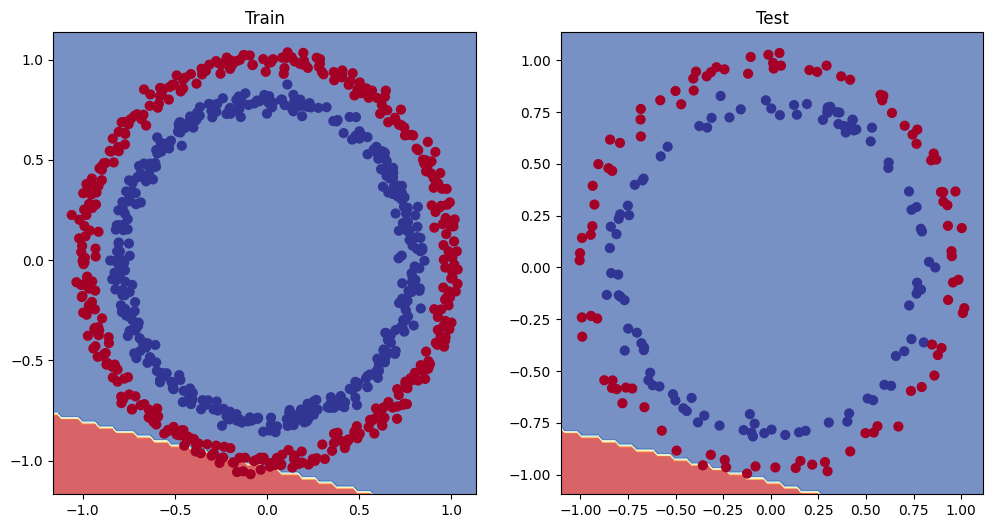

In [38]:
# plot decision boundary of the model 
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model,X_train,y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model,X_test,y_test)

### Improving a model (from a model perspective)

* Add more layer - give the model more chances to learn about patterns in the data 
* Add more hidden layer - go from 5 hidden units to 10 hidden units 
* Fit for longer 
* Changing the activation functions
* Change the learning rate 
* Change the loss function 

These options are all from model perspective because all are directly about the model rather than the data 

And because these options are all values we can change they are refer to as hyperparameters 


### Try to improve model by adding some more hidden layers and and hidden units 

* Adding more hidden units 5 -> 10 
* Increase the number of layers 2 -> 3 
* Increase the number of epochs 100 -> 1000

In [39]:
class CircleModelV1(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
        
    def forward(self,x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        #* this way of writing operations leverages speed up where possible behind the scenes 
        return self.layer_3(self.layer_2(self.layer_1(x)))
    
model_1 = CircleModelV1()
model_1.to(device)

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### Create a loss function and optimizer for new model

In [40]:

#* loss function 
loss_fn1 = nn.BCEWithLogitsLoss()

#* optimizer 
optimizer1 = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

### Write a training loop for model_1

In [41]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put data on the target device 
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    
    # forward pass 
    y_logits =  model_1(X_train).squeeze()
    
    # calculate the loss 
    loss = loss_fn1(y_logits,y_train)
    
    # calculate acc 
    acc = accuracy_fn(y_true=y_train, y_pred=torch.round(torch.sigmoid(y_logits)))
    
    
    #optimizer zero_grad 
    optimizer1.zero_grad()
    
    # loss backward 
    loss.backward()
    
    # backpropagation 
    optimizer1.step()    
    
    
    #* Testing 
    model.eval()
    with torch.inference_mode():
        y_pred_logits = model_1(X_test)
        y_preds = torch.round(torch.sigmoid(y_pred_logits))
        
         #* Calculate test loss/logits 
        test_loss = loss_fn(test_logits,y_test)
        
        test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
        
        #* print out what is happening 
        
        if epoch %100 == 0 :
            print(f'Epoch:{epoch} | Train loss: {loss:.5f}, Train Acc:{acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc:{test_acc:.2f}%')
        


Epoch:0 | Train loss: 0.69396, Train Acc:50.88% | Test Loss: 0.70987, Test Acc:50.50%


Epoch:100 | Train loss: 0.69369, Train Acc:50.25% | Test Loss: 0.70987, Test Acc:50.50%
Epoch:200 | Train loss: 0.69351, Train Acc:50.12% | Test Loss: 0.70987, Test Acc:50.50%
Epoch:300 | Train loss: 0.69339, Train Acc:50.50% | Test Loss: 0.70987, Test Acc:50.50%
Epoch:400 | Train loss: 0.69329, Train Acc:50.38% | Test Loss: 0.70987, Test Acc:50.50%
Epoch:500 | Train loss: 0.69322, Train Acc:49.88% | Test Loss: 0.70987, Test Acc:50.50%
Epoch:600 | Train loss: 0.69317, Train Acc:49.50% | Test Loss: 0.70987, Test Acc:50.50%
Epoch:700 | Train loss: 0.69313, Train Acc:49.38% | Test Loss: 0.70987, Test Acc:50.50%
Epoch:800 | Train loss: 0.69309, Train Acc:50.00% | Test Loss: 0.70987, Test Acc:50.50%
Epoch:900 | Train loss: 0.69307, Train Acc:50.62% | Test Loss: 0.70987, Test Acc:50.50%


### Plot the decision boundary of the model 

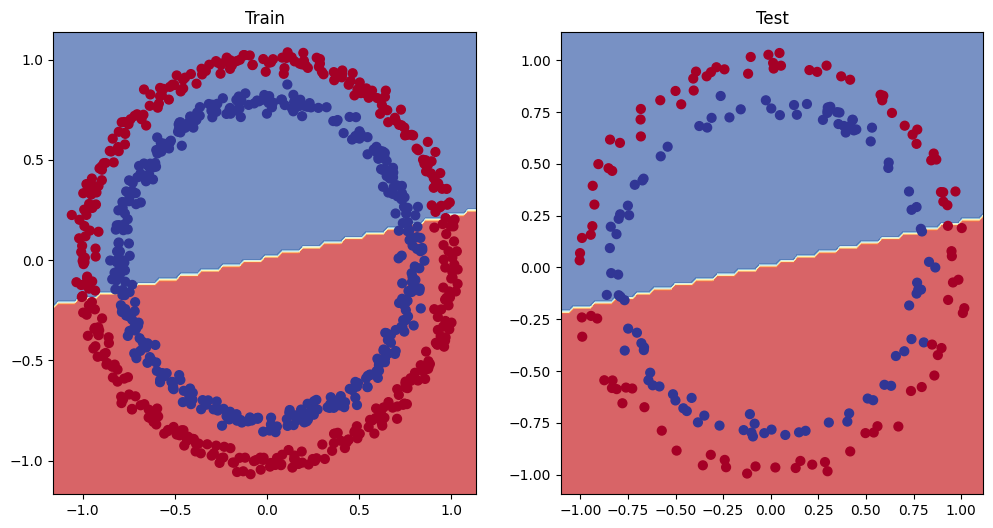

In [42]:
# plot decision boundary of the model 
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1,X_train,y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1,X_test,y_test)

### Preparing data to see if our model can fit a straight line 

* One way to troubleshoot to a larger problem is to test out a smaller problem  

In [43]:
#* Create some data 
weight = 0.7
bias = 0.3 

start = 0 
end = 1
step = 0.01 

#* Create data 
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = X_regression*weight + bias

#* Check the data 
print(len(X_regression))
X_regression[:5],y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [44]:
#* Create train and test split 
train_split = int(len(X_regression)*0.8)

X_train_regression , y_train_regression = X_regression[:train_split],y_regression[:train_split]
X_test_regression , y_test_regression = X_regression[train_split:],y_regression[train_split:]

len(X_train_regression),len(y_train_regression),len(X_test_regression),len(y_test_regression)


(80, 80, 20, 20)

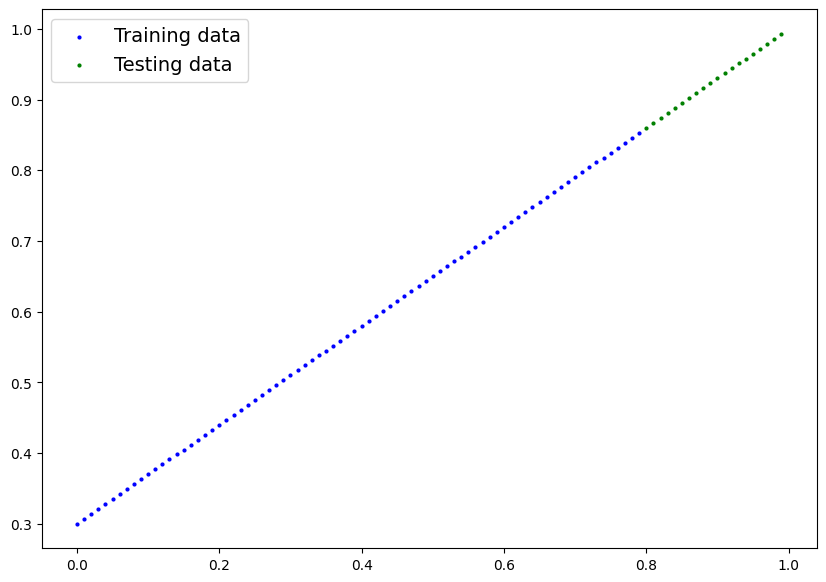

In [45]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### Adjust model_1, same structure but using nn.sequential 

In [46]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [47]:
## Loss and optimizer 
loss_fn2 = nn.L1Loss()

optimizer_2= torch.optim.SGD(model_2.parameters(),lr=0.01)

In [48]:
# Train the model 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs 
epochs = 1000 

# Put the date on to target device 
X_train_regression, y_train_regression = X_train_regression.to(device) , y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device) , y_test_regression.to(device)

#* training loop
for epoch in range(epochs):
    
    # Forward pass 
    y_pred= model_2(X_train_regression)
    
    # Loss Calculation 
    loss = loss_fn2(y_pred,y_train_regression)
    
    # optimizer zero grad 
    optimizer_2.zero_grad()
    
    # Backward propagation 
    loss.backward()
    
    # Gradient descent 
    optimizer_2.step()
    
    
    # Testing 
    model_2.eval()
    
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn2(test_pred,y_test_regression)
        
    # Print out what is happening 
    if epoch %25 == 0 :
        print(f'Epoch:{epoch}, Loss:{loss:.5f}, Test Loss:{test_loss:.5f}')
        
        


Epoch:0, Loss:0.75986, Test Loss:0.91103
Epoch:25, Loss:0.02246, Test Loss:0.04860
Epoch:50, Loss:0.03196, Test Loss:0.00108
Epoch:75, Loss:0.00581, Test Loss:0.04508
Epoch:100, Loss:0.02858, Test Loss:0.00081
Epoch:125, Loss:0.00864, Test Loss:0.04477
Epoch:150, Loss:0.02744, Test Loss:0.00169
Epoch:175, Loss:0.00922, Test Loss:0.04598
Epoch:200, Loss:0.02533, Test Loss:0.00209
Epoch:225, Loss:0.01080, Test Loss:0.04583
Epoch:250, Loss:0.02331, Test Loss:0.00254
Epoch:275, Loss:0.01231, Test Loss:0.04574
Epoch:300, Loss:0.02137, Test Loss:0.00305
Epoch:325, Loss:0.01374, Test Loss:0.04435
Epoch:350, Loss:0.01926, Test Loss:0.00359
Epoch:375, Loss:0.01412, Test Loss:0.04507
Epoch:400, Loss:0.01964, Test Loss:0.00341
Epoch:425, Loss:0.01405, Test Loss:0.04445
Epoch:450, Loss:0.01937, Test Loss:0.00327
Epoch:475, Loss:0.01394, Test Loss:0.04390
Epoch:500, Loss:0.01940, Test Loss:0.00387
Epoch:525, Loss:0.01353, Test Loss:0.04272
Epoch:550, Loss:0.01919, Test Loss:0.00380
Epoch:575, Loss:

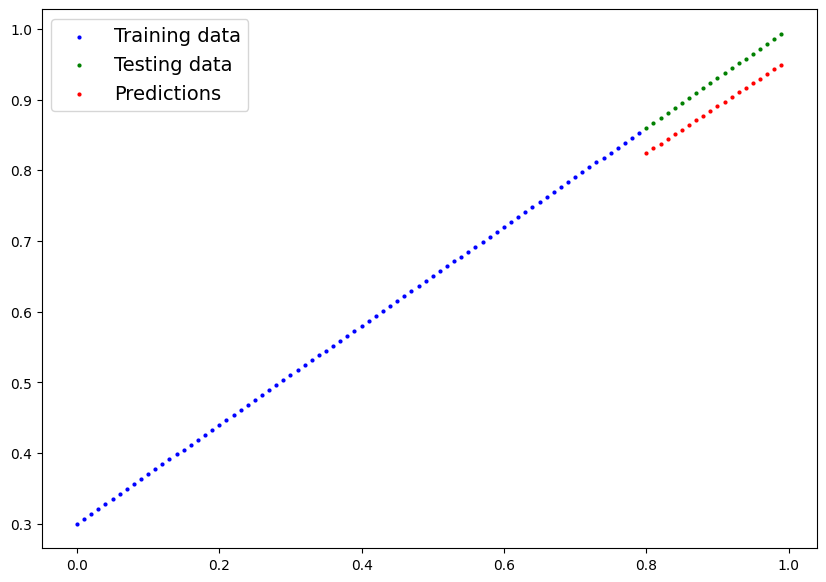

In [49]:
# Switch to evalutation mode 
model_2.eval()

# make predictions (inference mode )
with torch.inference_mode():
    y_preds = model_2(X_test_regression)
    
    plot_predictions(train_data=X_train_regression.cpu(),
                    train_labels=y_train_regression.cpu(),
                    test_data=X_test_regression.cpu(),
                    test_labels=y_test_regression.cpu(),
                    predictions=y_preds.cpu())

    

### 6. The missing piece: non-linearity 

"What pattern could you draw if you were given an infinite amount of a straight line and non-straight line"

Or in machine learning terms, an infinite (but really it is finite) linear and non-linear functions?


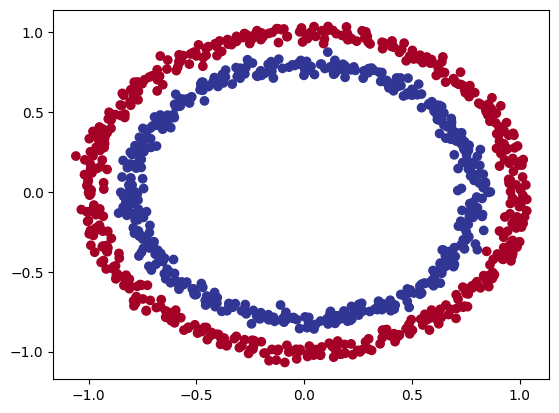

In [50]:
# Make and plot data 
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000 

X,y = make_circles(n_samples,noise=0.03,random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [51]:
# Convert data to tensors and then train and test the data 
import torch 
from sklearn.model_selection import train_test_split


# Turn data into tensors 
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)


# Split into test and train data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train[:5], y_train[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [52]:
# Build a model with non linear activation function 
from torch import nn 

class CircleModelV3(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10,out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self,x):
        #* where should we put our non-linear activation function 
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    

model3 = CircleModelV3().to(device)
model3.state_dict


<bound method Module.state_dict of CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)>

In [53]:
#setup loss and optimizer 

loss_fn3 = nn.BCEWithLogitsLoss()
optimizer3 = torch.optim.SGD(params=model3.parameters(),lr=0.1)


### Training model with non linearity 

In [54]:
# Random seed 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# epoch 
epochs = 4000

# put all values on to devices 
X_train , y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

## Loop through data 
for epoch in range(epochs):
    
    model3.train()
    
    ## Training 
    y_logits = model3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #* logits -> predictions prbabilities -> prediction labels 
    
    ## loss calculations 
    loss = loss_fn3(y_logits,y_train)
    
    #accuracy 
    acc = accuracy_fn(y_true=y_train,y_pred=y_pred)
    
    # grad zero 
    optimizer3.zero_grad()
    
    # back propagation 
    loss.backward()

    # optimizer Step 
    optimizer3.step()
    
    if epoch % 10 == 0: 
        
        model3.eval()
        with torch.inference_mode():
            test_logits = model3(X_test).squeeze()
            test_pred = torch.round(torch.sigmoid(test_logits))
            
            test_loss = loss_fn(test_logits,y_test)
            
            test_acc= accuracy_fn(y_test,test_pred)
            
        #* print out what is happening there     
        print(f'Epoch:{epoch} | Loss: {loss:.4f} | Acc:{acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc:{test_acc:.4f}% ')

Epoch:0 | Loss: 0.6929 | Acc:50.00% | Test Loss: 0.6932 | Test Acc:50.0000% 
Epoch:10 | Loss: 0.6925 | Acc:50.50% | Test Loss: 0.6926 | Test Acc:50.0000% 
Epoch:20 | Loss: 0.6922 | Acc:59.13% | Test Loss: 0.6923 | Test Acc:56.5000% 
Epoch:30 | Loss: 0.6921 | Acc:70.25% | Test Loss: 0.6921 | Test Acc:68.0000% 
Epoch:40 | Loss: 0.6919 | Acc:68.38% | Test Loss: 0.6919 | Test Acc:71.0000% 
Epoch:50 | Loss: 0.6918 | Acc:58.25% | Test Loss: 0.6918 | Test Acc:58.0000% 
Epoch:60 | Loss: 0.6917 | Acc:54.00% | Test Loss: 0.6916 | Test Acc:54.5000% 
Epoch:70 | Loss: 0.6915 | Acc:53.12% | Test Loss: 0.6915 | Test Acc:53.0000% 
Epoch:80 | Loss: 0.6914 | Acc:52.62% | Test Loss: 0.6913 | Test Acc:53.0000% 
Epoch:90 | Loss: 0.6913 | Acc:52.75% | Test Loss: 0.6912 | Test Acc:53.0000% 
Epoch:100 | Loss: 0.6912 | Acc:52.88% | Test Loss: 0.6910 | Test Acc:52.5000% 
Epoch:110 | Loss: 0.6910 | Acc:52.88% | Test Loss: 0.6909 | Test Acc:53.5000% 
Epoch:120 | Loss: 0.6909 | Acc:53.12% | Test Loss: 0.6907 | Tes

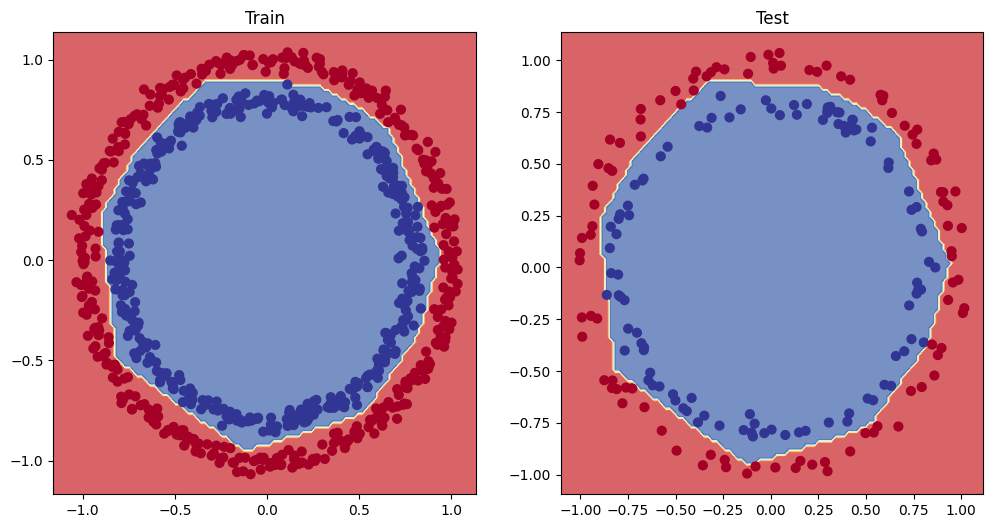

In [55]:
# plot decision boundary of the model 
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model3,X_train,y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model3,X_test,y_test)

model3 = model3.to(device)

### Evaluating a model trained with non-linear activation functions 

In [56]:
#* Make predictions 
model3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model3(X_test))).squeeze()

y_preds[:10],y_test[:10]
    
    

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

In [57]:
next(model3.parameters()).device

device(type='cuda', index=0)

### 7. Replication non-linear activation functions 

Neural networks, rather than us telling the model what to learn we give it the tools to discovver patterns in data . And it tries to figure out the patterns on its own. 

And these tools are Linear and Non-Linear Functions

In [58]:
# Create a tensor 
A = torch.arange(-10,10,1,dtype=torch.float32)
A.dtype

torch.float32

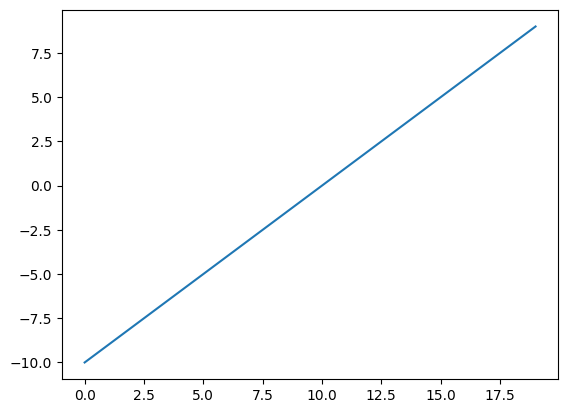

In [59]:
# Visualize the data 
plt.plot(A)

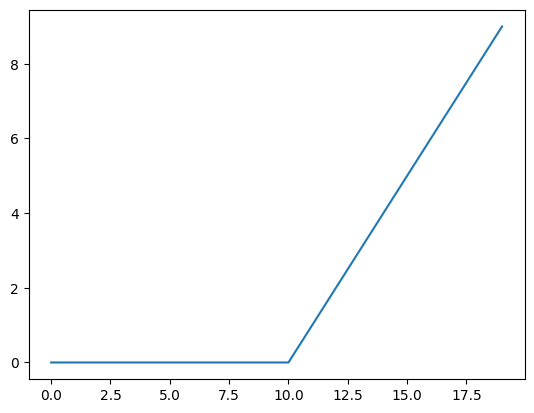

In [60]:
plt.plot(torch.relu(A))

In [61]:
def relu(x):
    return torch.max(torch.tensor(0),x) # inputs must be tensors 

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

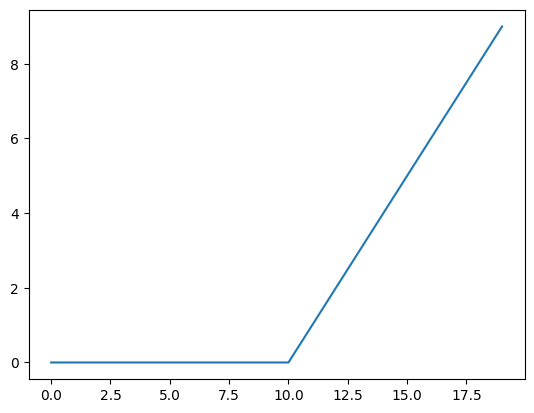

In [62]:
#* plot custom relu activation function 
plt.plot(relu(A))

In [63]:
# Now lets do the same thing with sigmoid 
def sigmoid(x):
    return 1/(1+torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

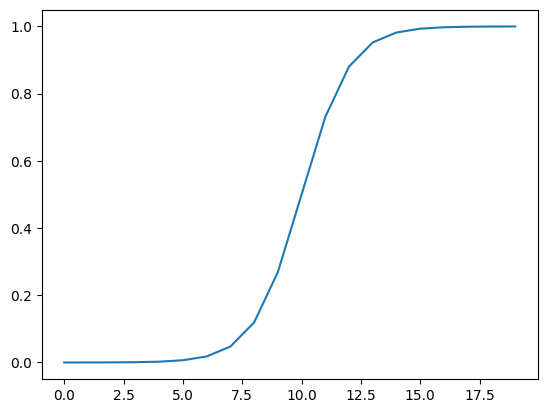

In [64]:
plt.plot(torch.sigmoid(A))

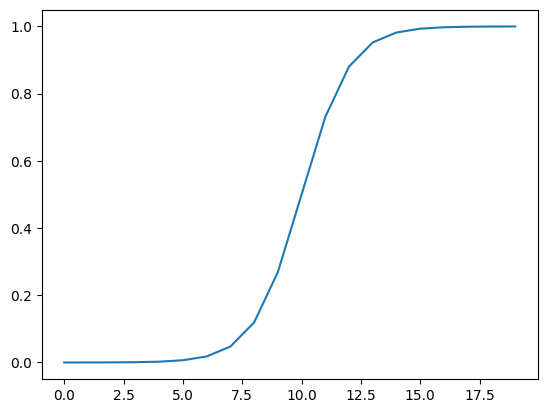

In [65]:
plt.plot(sigmoid(A))

In [66]:
from pathlib import Path

#* create model's directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)


#* Create model's save path 
MODEL_NAME = "02_non_linear_binary_classification_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


#* Save the model_state_dict 
print(f'model saving to {model_0.state_dict(),MODEL_SAVE_PATH}')
torch.save(obj=model3.state_dict(),f=MODEL_SAVE_PATH)

model saving to (OrderedDict([('0.weight', tensor([[ 0.5182,  0.5380],
        [ 0.6567,  0.0982],
        [ 0.1700, -0.5469],
        [ 0.2502, -0.1122],
        [ 0.4770,  0.0070]], device='cuda:0')), ('0.bias', tensor([ 0.5628,  0.3788,  0.6663, -0.1794, -0.3533], device='cuda:0')), ('1.weight', tensor([[ 0.0933,  0.0425,  0.1512,  0.2347,  0.3809],
        [-0.0629,  0.1101,  0.1687, -0.0427,  0.4257]], device='cuda:0')), ('1.bias', tensor([-0.2721,  0.4300], device='cuda:0'))]), WindowsPath('models/02_non_linear_binary_classification_model.pth'))


In [67]:
import netron

# 'model.pth' dosyasını görselleştirmek için
netron.start('./models/02_non_linear_binary_classification_model.pth')

Serving './models/02_non_linear_binary_classification_model.pth' at http://localhost:8080


('localhost', 8080)